In [128]:
import pandas_ods_reader as pds
import sklearn as sk

from sklearn.model_selection import train_test_split
import scipy.stats as sc
import statsmodels.api as sm
import numpy as np

In [129]:
df=pds.read_ods("dataset_monthly.ods",1)

In [130]:
print(df.head())

     date  usd/pound  usd/ton CLP_DATE   Exc_1 YUAN_DATE   Exc_2  usd/pound5  \
0  Dec 90     2.5470   5094.0   Dec 90  332.25    Dec 90  5.2352     2.54701   
1  Jan 91     2.5506   5101.2   Jan 91  342.00    Jan 91  5.2352     2.55064   
2  Feb 91     2.5327   5065.4   Feb 91  340.00    Feb 91  5.2352     2.53273   
3  Mar 91     2.5027   5005.4   Mar 91  345.50    Mar 91  5.2352     2.50265   
4  Apr 91     2.5220   5044.0   Apr 91  338.75    Apr 91  5.3036     2.52198   

   usd/ton5  
0   5094.02  
1   5101.28  
2   5065.46  
3   5005.30  
4   5043.96  


preparing independent variable

In [131]:
xn=list(df["Exc_1"])[:-1]
x1n=xn[:-1]            
print(len(xn))
x2n=xn[1:]             

354


In [132]:
xl1n=list(np.log(x1n))
xl2n=list(np.log(x2n))

In [133]:
xdl=[]
lexl1n=len(xl1n)
for i in range(lexl1n):
    xdl.append(xl2n[i]-xl1n[i])
print(len(xdl))    #del ln

353


In [134]:
x=[]
for i in range(352):
    x.append(xdl[i+1]+xdl[i])  #p[t-1]+p[t-2]
len(x)    

352

preparing dependent variable

In [135]:
yn=list(df["usd/ton5"][2:])     #clp(t-1)+clp(t-2)
yl=list(np.log(yn))
leny=len(yn)
print(leny)

353


In [136]:
yout,y=[],0
rem={}
leny=leny-1
for i in range(leny):
    y=yl[i+1]-yl[i]
    yout.append(y)
    rem[i]=[y,yl[i]]
len(yout)

352

In [137]:
xstd,ystd=sc.tstd(x,ddof=1),sc.tstd(yout,ddof=1)
xm,ym=np.mean(x),np.mean(yout)

x=sc.zscore(x,axis=0,ddof=2)
y=sc.zscore(yout,axis=0,ddof=2)
test_random=[i for i in range(352)]
x=[round(i,3) for i in x]
y=[round(i,3) for i in y]


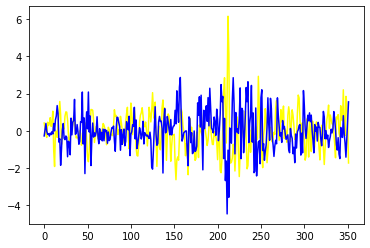

In [138]:
plt.plot(x,color="yellow")
plt.plot(y,color="blue")
plt.show()

In [139]:
x_tr,x_te,y_tr,y_te=train_test_split(x,test_random,random_state=5,test_size=0.3)

In [140]:
x_tr=np.array(x_tr)
y_tr=np.array([y[i] for i in y_tr])
print(len(x_tr),len(y_tr))
model=sm.OLS(x_tr.reshape(-1,1),y_tr).fit()
print(model.summary())

246 246
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.056
Model:                            OLS   Adj. R-squared (uncentered):              0.053
Method:                 Least Squares   F-statistic:                              14.67
Date:                Sat, 01 Aug 2020   Prob (F-statistic):                    0.000163
Time:                        19:11:06   Log-Likelihood:                         -321.51
No. Observations:                 246   AIC:                                      645.0
Df Residuals:                     245   BIC:                                      648.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [141]:
pre=model.predict(x_te)
pre=list(pre)

In [142]:
#actual result
y_test=[yout[i] for i in y_te]

In [119]:
def z_inv(l):
    r=[i*(ystd-2)+ym for i in l]
    return r

In [120]:
pre_z_inv=z_inv(pre)
len(pre_z_inv)

106

del inverse

In [121]:
def del_inv(l):
    yn_1=[rem[i][1] for i in y_te]
    ylog_predicted=[yn_1[i]+l[i] for i in range(106)]
    return ylog_predicted

In [122]:
pre_z_del_inv=del_inv(pre_z_inv)

In [123]:
def log_inv(l):
    r=[np.exp(i) for i in l]
    return r

In [124]:
act_pre=log_inv(pre_z_del_inv)

In [125]:
np.sqrt(sk.metrics.mean_squared_error(y_test,act_pre))

23818.29596379078

In [126]:
sc.pearsonr(act_pre,x_te)[0]**2

0.5394675655981916

In [127]:
sc.pearsonr(y_tr,x_tr)[0]**2

0.056860301287183224